In [1]:
import mlrose_hiive 
import numpy as np
import time

import matplotlib.pyplot as plt

# Kanpsack problem
https://readthedocs.org/projects/mlrose/downloads/pdf/stable/

https://mlrose.readthedocs.io/en/stable/source/tutorial2.html

https://github.com/gkhayes/mlrose/blob/master/tutorial_examples.ipynb

https://mlrose.readthedocs.io/en/stable/source/algorithms.html?highlight=random_hill_climb#mlrose.algorithms.random_hill_climb

In [2]:
def kanpsap_problem():
    val =  [4, 2, 1, 2, 10,10, 20, 30 ]
    wt = [3, 4, 5, 9, 4,60, 100, 120]
    max_wt = 10
    fitness = mlrose_hiive.Knapsack(wt, val, max_wt)
    problem_fit = mlrose_hiive.DiscreteOpt(length=len(wt), fitness_fn=fitness,max_val=8,maximize=True)
    
    return problem_fit

# Travelling Salesperson

In [3]:
def Travelling_salesman():
    destinations = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852), \
                 (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000), \
                 (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), \
                 (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
                 (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361), \
                 (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]
    fitness_dists = mlrose_hiive.TravellingSales(distances = destinations)
    problem_fit = mlrose_hiive.TSPOpt(length = 8, fitness_fn = fitness_dists, maximize = False)
    
    return problem_fit

# Six Peaks

In [4]:
def six_peaks():
    fitness = mlrose_hiive.SixPeaks(t_pct=0.15)
    problem = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness,max_val=8,maximize=True)
    return problem

    

# Algorithms

In [5]:
def genetic_algorithm(problem,ProblemName,fig):
    start_time = time.time()
    iter_range = range(0,1001,100)
    best_fitness_range = []
    for i in iter_range:
        best_state, best_fitness, _ = mlrose_hiive.genetic_alg(problem,pop_size=200, 
                                                            mutation_prob = 0.2,
                                                           max_attempts = 20,
                                                            max_iters=i,
                                                           random_state = 20)
        best_fitness_range.append(best_fitness)
    print(" It took %s seconds " % (time.time() - start_time))
    if fig == True:
        plt.figure()
        plt.title(ProblemName)
        plt.xlabel("Max Iteration")
        plt.ylabel("Best Fitness")
        plt.plot(iter_range, best_fitness_range, 'o-', color="r", label="best fitness")
        plt.legend()
        plt.savefig(ProblemName+'.png',format='png',bbox_inches = "tight")
        plt.show()
        return 
    else:
        
        return best_fitness_range
    
    

 It took 3.0853257179260254 seconds 


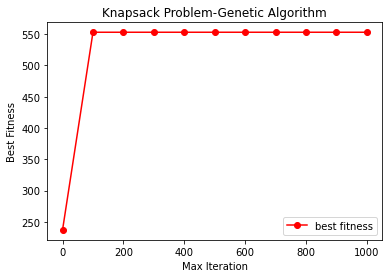

 It took 40.576854944229126 seconds 


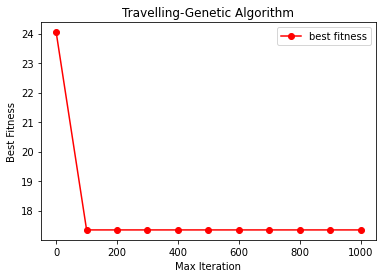

 It took 1.8719680309295654 seconds 


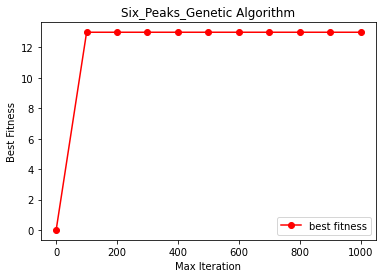

In [6]:
genetic_algorithm(kanpsap_problem(),"Knapsack Problem-Genetic Algorithm",True)
genetic_algorithm(Travelling_salesman(),"Travelling-Genetic Algorithm",True)
genetic_algorithm(six_peaks(),"Six_Peaks_Genetic Algorithm",True)



In [7]:
def random_hill_climb(problem,ProblemName,fig):
    start_time = time.time()
    
    iter_range = range(0,1001,100)
    best_fitness_range = []
    
    for i in iter_range:
        random_hill_state, random_hill_fitness, _ = mlrose_hiive.random_hill_climb(problem,
                                                                                   max_attempts = i,
                                                                                   max_iters= 20,
                                                                                   restarts = 10,
                                                                                   random_state=20)
        best_fitness_range.append(random_hill_fitness)
    print(" It took %s seconds " % (time.time() - start_time))
    if fig == True:
        plt.figure()
        plt.title(ProblemName)
        plt.xlabel("Max Iteration")
        plt.ylabel("Best Fitness")
        plt.plot(iter_range, best_fitness_range, 'o-', color="r", label="best fitness")
        plt.legend()
        plt.savefig(ProblemName+'.png',format='png',bbox_inches = "tight")
        plt.show()
        return 
    else:
        return best_fitness_range



 It took 0.07156920433044434 seconds 


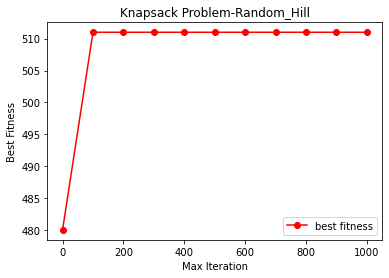

 It took 2.269702911376953 seconds 


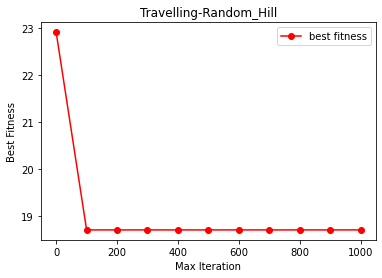

 It took 0.034346818923950195 seconds 


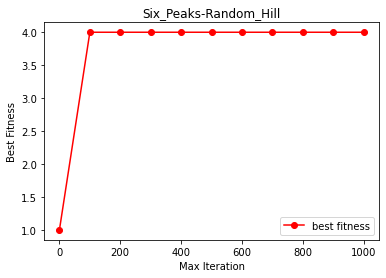

In [8]:
random_hill_climb(kanpsap_problem(),"Knapsack Problem-Random_Hill",True)
random_hill_climb(Travelling_salesman(),"Travelling-Random_Hill",True)
random_hill_climb(six_peaks(),"Six_Peaks-Random_Hill",True)



In [9]:
def simulated_annealing(problem,ProblemName,fig):
    start_time = time.time()
    iter_range = range(0,1001,100)
    best_fitness_range = []
    for i in iter_range:
        sim_best_state, sim_best_fitness, _ = mlrose_hiive.simulated_annealing(problem, 
                                                                               max_iters=i,
                                                                               random_state=20,
                                                                        
                                                                            )
        best_fitness_range.append(sim_best_fitness)
    print(" It took %s seconds " % (time.time() - start_time))
    if fig == True:
        plt.figure()
        plt.title(ProblemName)
        plt.xlabel("Max Iteration")
        plt.ylabel("Best Fitness")
        plt.plot(iter_range, best_fitness_range, 'o-', color="r", label="best fitness")
        plt.legend()
        plt.savefig(ProblemName+'.png',format='png',bbox_inches = "tight")
        plt.show()
        return
    else:
        return best_fitness_range


 It took 0.012745141983032227 seconds 


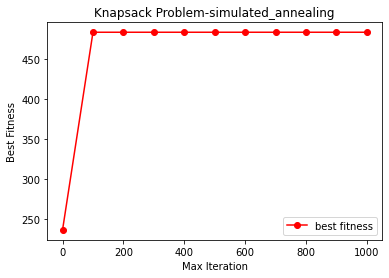

 It took 0.1953258514404297 seconds 


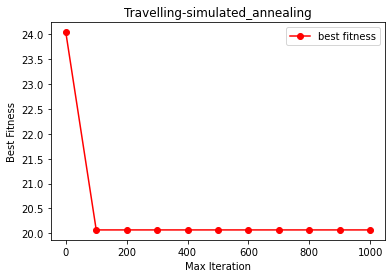

 It took 0.06885337829589844 seconds 


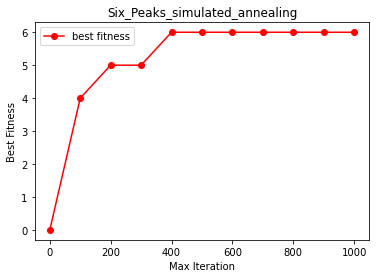

In [10]:
simulated_annealing(kanpsap_problem(),"Knapsack Problem-simulated_annealing",True)
simulated_annealing(Travelling_salesman(),"Travelling-simulated_annealing",True)
simulated_annealing(six_peaks(),"Six_Peaks_simulated_annealing",True)

In [11]:
def mimmic(problem,ProblemName):
    start_time = time.time()
    iter_range = range(1,1101,100)
    best_fitness_range = []
    
    for i in iter_range:
        mimmic_best_state, mimmic_best_fitness, _ = mlrose_hiive.mimic(problem,
                                                                       max_attempts=i,
                                                                       pop_size = 500,
                                                                       keep_pct=0.5,
                                                                       random_state=20)
        best_fitness_range.append(mimmic_best_fitness)
    print(" It took %s seconds " % (time.time() - start_time))  
    plt.figure()
    plt.title(ProblemName)
    plt.xlabel("Max Iteration")
    plt.ylabel("Best Fitness")
    plt.plot(iter_range, best_fitness_range, 'o-', color="r", label="best fitness")
    plt.legend()
    plt.savefig(ProblemName+'.png',format='png',bbox_inches = "tight")
    plt.show()
    return best_fitness_range

 It took 117.12034320831299 seconds 


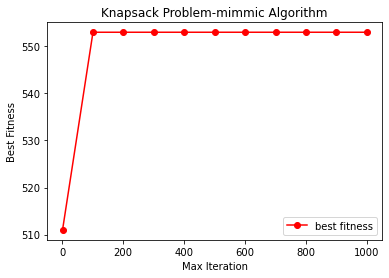

 It took 9690.501507043839 seconds 


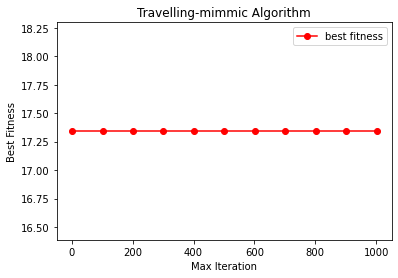

 It took 105.24402785301208 seconds 


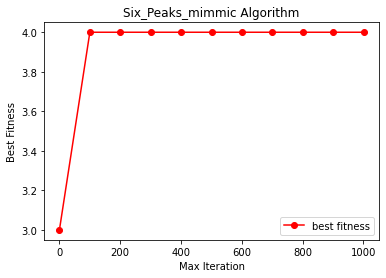

In [12]:
kp_mimmic = mimmic(kanpsap_problem(),"Knapsack Problem-mimmic Algorithm")
ts_mimmic = mimmic(Travelling_salesman(),"Travelling-mimmic Algorithm")
sp_mimmic = mimmic(six_peaks(),"Six_Peaks_mimmic Algorithm")
    

In [13]:
def rescue_code(function):
    import inspect
    get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))

In [14]:
rescue_code(compare_algorithm)

NameError: name 'compare_algorithm' is not defined

In [15]:
def compare_algorithm(RandomHillClimbing,simulatedAnnealing,GeneticAlgorthim,MIMIC,problem):
    algroRage = range(0,1001,100)
    plt.figure()
    plt.title("Alogorithim Comparision" + problem)
    plt.xlabel("Max Iteration")
    plt.ylabel("Best Fitness")
    plt.plot(algroRage, RandomHillClimbing, 'o-', color="c", label="RHC")
    plt.plot(algroRage, simulatedAnnealing, 'o-', color="m", label="SA")
    plt.plot(algroRage, GeneticAlgorthim, 'o-', color="b", label="GA")
    plt.plot(algroRage, MIMIC, 'o-', color="y", label="MIMIC")
    plt.legend()
    plt.savefig("Comparision of"+ problem +'.png',format='png',bbox_inches = "tight")
    plt.show()


In [16]:
kp_rhc = random_hill_climb(kanpsap_problem(),"Knapsack Problem-Random_Hill",False)
kp_ga = genetic_algorithm(kanpsap_problem(),"Knapsack Problem-Genetic Algorithm",False)
kp_sa = simulated_annealing(kanpsap_problem(),"Knapsack Problem-simulated_annealing",False)

print("Knapsack fitness scores for RHC: ", kp_rhc)
print("Knapsack fitness scores for GA: ", kp_ga)
print("Knapsack fitness scores for SA:", kp_sa)
print("Knapsack fitness scores for MP:", kp_mimmic)


 It took 0.0938260555267334 seconds 
 It took 3.0844931602478027 seconds 
 It took 0.008465051651000977 seconds 
Knapsack fitness scores for RHC:  [480.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0, 511.0]
Knapsack fitness scores for GA:  [237.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0]
Knapsack fitness scores for SA: [237.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483.0]
Knapsack fitness scores for MP: [511.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0, 553.0]


In [17]:
print("Knapsack Mean fitness scores for RHC: ", np.mean(kp_rhc))
print("Knapsack Mean fitness scores for GA: ", np.mean(kp_ga))
print("Knapsack Mean fitness scores for SA:", np.mean(kp_sa))
print("Knapsack Mean fitness scores for MP:", np.mean(kp_mimmic))

Knapsack Mean fitness scores for RHC:  508.1818181818182
Knapsack Mean fitness scores for GA:  524.2727272727273
Knapsack Mean fitness scores for SA: 460.6363636363636
Knapsack Mean fitness scores for MP: 549.1818181818181


In [18]:
ts_rhc = random_hill_climb(Travelling_salesman(),"Travelling-Random_Hill",False)
ts_ga = genetic_algorithm(Travelling_salesman(),"Travelling-Genetic Algorithm",False)
ts_sa = simulated_annealing(Travelling_salesman(),"Travelling-Simulated Annealing",False)
print("Travelling salesman fitness scores for RHC: ", ts_rhc)
print("Travelling salesman fitness scores for GA: ", ts_ga)
print("Travelling salesman fitness scores for SA:", ts_sa)
print("Travelling salesman fitness scores for MP:", ts_mimmic)

 It took 2.3079710006713867 seconds 
 It took 40.43966102600098 seconds 
 It took 0.18125391006469727 seconds 
Travelling salesman fitness scores for RHC:  [22.9157, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123, 18.7123]
Travelling salesman fitness scores for GA:  [24.043400000000002, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428]
Travelling salesman fitness scores for SA: [24.043400000000002, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003, 20.067500000000003]
Travelling salesman fitness scores for MP: [17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428, 17.3428]


In [24]:
print("Knapsack Mean fitness scores for RHC: ", np.mean(ts_rhc))
print("Knapsack Mean fitness scores for GA: ", np.mean(ts_ga))
print("Knapsack Mean fitness scores for SA:", np.mean(ts_sa))
print("Knapsack Mean fitness scores for MP:", np.mean(ts_mimmic))

Knapsack Mean fitness scores for RHC:  19.09442727272727
Knapsack Mean fitness scores for GA:  17.951945454545456
Knapsack Mean fitness scores for SA: 20.428945454545456
Knapsack Mean fitness scores for MP: 17.342800000000004


In [19]:
sp_rhc = random_hill_climb(six_peaks(),"Six_Peaks-Random_Hill",False)
sp_ga = genetic_algorithm(six_peaks(),"Six_Peaks_Genetic Algorithm",False)
sp_sa= simulated_annealing(six_peaks(),"Six_Peaks_simulated_annealing",False)
print("Travelling salesman fitness scores for RHC: ", sp_rhc)
print("Travelling salesman fitness scores for GA: ", sp_ga)
print("Travelling salesman fitness scores for SA:", sp_sa)
print("Travelling salesman fitness scores for MP:", sp_mimmic)

 It took 0.04117870330810547 seconds 
 It took 1.8822619915008545 seconds 
 It took 0.0630948543548584 seconds 
Travelling salesman fitness scores for RHC:  [1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Travelling salesman fitness scores for GA:  [0.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0]
Travelling salesman fitness scores for SA: [0.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
Travelling salesman fitness scores for MP: [3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]


In [25]:
print("six Mean fitness scores for RHC: ", np.mean(sp_rhc))
print("six Mean fitness scores for GA: ", np.mean(sp_ga))
print("six Mean fitness scores for SA:", np.mean(sp_sa))
print("six Mean fitness scores for MP:", np.mean(sp_mimmic))

six Mean fitness scores for RHC:  3.727272727272727
six Mean fitness scores for GA:  11.818181818181818
six Mean fitness scores for SA: 5.090909090909091
six Mean fitness scores for MP: 3.909090909090909


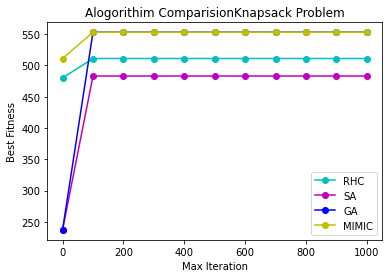

In [29]:
compare_algorithm(kp_rhc,kp_sa,kp_ga,kp_mimmic,"Knapsack Problem")


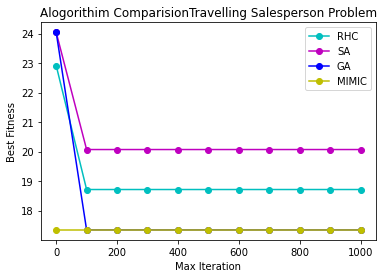

In [28]:
compare_algorithm(ts_rhc,ts_sa,ts_ga,ts_mimmic,"Travelling Salesperson Problem")

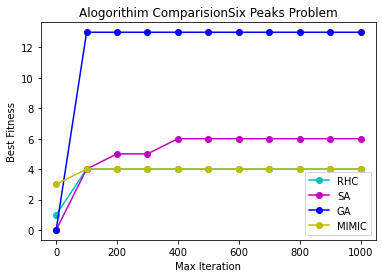

In [26]:
compare_algorithm(sp_rhc,sp_sa,sp_ga,sp_mimmic,"Six Peaks Problem")

In [23]:
destinations = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), (0, 5, 5.3852), \
                 (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), (1, 3, 2.8284), (1, 4, 2.0000), \
                 (1, 5, 4.1231), (1, 6, 4.2426), (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), \
                 (2, 5, 4.4721), (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
                 (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), (4, 7, 2.2361), \
                 (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

print(len(destinations))

28
